### Comparison Data for Supplemental Instruction
#### Cleaning, Wrangling, and Analysis
Clara Smith

In [3]:
# import libraries
import pandas as pd
import glob 
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Import course python dictionary
import sys
sys.path.append("/home/clarasmith/Sync/Fall 2025/SI/SI_Data")
from SI_Course_Map import course_map

In [4]:
# Test read functionality of pandas
file = "./Comparison_Data/comparison_scores__spring_2025.xlsx"

# Read in one small table from the file: Non-SI Group for starters.
df = pd.read_excel(
    file,
    sheet_name=0,
    header=None
)

In [5]:
# Metadata for Non-SI Group
non_si_total = df.iloc[3, 1]


In [6]:
#  Dataframe Containing Non-SI Information
non_si = pd.DataFrame({
    "SI_Group": ["Non-SI"],
    "Class_Size": ["0"],
    "Enrollment": [non_si_total]
})

In [7]:
non_si

,SI_Group,Class_Size,Enrollment
0,Non-SI,0,55


In [8]:
si_class_size = df.iloc[2, 5:11].dropna().tolist()
si_enrollment = df.iloc[3, 5:11].dropna().tolist()

In [9]:
print(si_class_size)
print(si_enrollment)

['1 to 4', '5 to 9', '10+']
['15', 111, 429]


In [10]:
si = pd.DataFrame({
    "SI_Group": ["SI"] * len(si_class_size),
    "Class_Size": si_class_size,
    "Enrollment": si_enrollment
})

In [11]:
si

,SI_Group,Class_Size,Enrollment
0,SI,1 to 4,15
1,SI,5 to 9,111
2,SI,10+,429


In [12]:
# Combine dataframes into one
SI_Enrollment_df = pd.concat([non_si, si], ignore_index=True)

In [13]:
SI_Enrollment_df

,SI_Group,Class_Size,Enrollment
0,Non-SI,0,55
1,SI,1 to 4,15
2,SI,5 to 9,111
3,SI,10+,429


In [14]:
# Prepare bulk assembly of dataframe for all tabs

# Empty list to hold names of courses
all_courses = []

xls_2025 = pd.ExcelFile(file)

for sheet in xls_2025.sheet_names:
    # Read in sheet names
    df = pd.read_excel(file, sheet_name=sheet, header=None)

    # Extract Non-SI data
    non_si_total = df.iloc[3, 1]
    non_si = pd.DataFrame({
        "SI_Group": ["Non-SI"],
        "Class_Size": ["0"],
        "Enrollment": [non_si_total]
    })

    # Extract SI data
    si_class_size = df.iloc[2, 5:11].dropna().tolist()
    si_enrollment = df.iloc[3, 5:11].dropna().tolist()
    si = pd.DataFrame({
        "SI_Group": ["SI"] * len(si_class_size),
        "Class_Size": si_class_size,
        "Enrollment": si_enrollment
    })

    # Combine into one DataFrame for this sheet
    si_enrollment_df = pd.concat([non_si, si], ignore_index=True)

    # Add the sheet name as the course
    si_enrollment_df["Course_Name"] = sheet

    # Add to empty list
    all_courses.append(si_enrollment_df)


In [15]:
# Combine all courses
all_data = pd.concat(all_courses, ignore_index=True)

In [16]:
print(all_data.head(15))

   SI_Group Class_Size Enrollment        Course_Name
0    Non-SI          0         55         BIOL 10103
1        SI     1 to 4         15         BIOL 10103
2        SI     5 to 9        111         BIOL 10103
3        SI        10+        429         BIOL 10103
4    Non-SI          0         23         CHEM 12103
5        SI     1 to 4          7         CHEM 12103
6        SI     5 to 9         18         CHEM 12103
7        SI        10+        128         CHEM 12103
8    Non-SI          0         16  CHEM 12103 Online
9        SI     1 to 4          1  CHEM 12103 Online
10       SI     5 to 9          4  CHEM 12103 Online
11       SI        10+          7  CHEM 12103 Online
12   Non-SI          0        158         CHEM 14103
13       SI     1 to 4         45         CHEM 14103
14       SI     5 to 9         76         CHEM 14103


In [17]:
# Do this across all comparison score files in the Comparison_Data directory. 
path = "./Comparison_Data"

# Grab all comparison score files, ignoring final_data
files = glob.glob(os.path.join(path, "comparison_scores_*.xlsx"))

# Make an empty list that can hold all data collected from the files.
all_data = []

In [18]:
# Create a forr loop that will extract semesterly information from all files.
for file in files:
    # Extract semester information from filename
    # Basically, extracts out _[semester]_[year] as a string for further parsing.
    base = os.path.basename(file)
    semester_str = base.replace("comparison_scores_", "").replace(".xlsx", "")

    # Remove leading underscore
    semester_str = semester_str.lstrip("_")
    
    # Split into parts
    parts = semester_str.split("_")
    semester_name = parts[0]
    year = parts[1]
    print(semester_name)
    print(year)

    # Load the excel workbooks, so the sheets can be iterated through
    xls = pd.ExcelFile(file)

    # Replicate what was done above, extract sheet information for every course.
    for sheet in xls.sheet_names:
        df = pd.read_excel(file, sheet_name=sheet, header=None)

        # Extract non-SI data
        non_si_total = df.iloc[3, 1]
        non_si = pd.DataFrame({
            "SI_Group": ["Non-SI"],
            "Class_Size": ["0"],
            "Enrollment": [non_si_total]
        })

        # Extract SI
        si_class_size = df.iloc[2, 5:11].tolist()
        si_enrollment = df.iloc[3, 5:11].tolist()
        # Pair them up safely (handles unequal lengths)
        si_pairs = [(c, e) for c, e in zip(si_class_size, si_enrollment) if pd.notna(c) and pd.notna(e)]
        si = pd.DataFrame(si_pairs, columns=["Class_Size", "Enrollment"])
        si["SI_Group"] = "SI"

        # Combine them together
        si_enrollment_df = pd.concat([non_si, si], ignore_index=True)
        si_enrollment_df["Course_Name"] = sheet
        si_enrollment_df["Semester"] = semester_name
        si_enrollment_df["Year"] = year

        all_data.append(si_enrollment_df)

spring
2022
spring
2019
spring
2024
fall
2020
fall
2021
spring
2025
fall
2018
fall
2019
fall
2023
fall
2024
spring
2020
spring
2021


In [19]:
# Final merged dataframe
Complete_Enrollment_Dataframe = pd.concat(all_data, ignore_index=True)

In [20]:
# Eliminate duplicates
Complete_Enrollment_Dataframe = Complete_Enrollment_Dataframe.drop_duplicates(ignore_index=True)

# Replace NA values in Enrollment to 0.
Complete_Enrollment_Dataframe["Enrollment"] = Complete_Enrollment_Dataframe["Enrollment"].fillna(0)

# Convert Enrollment to numeric datatype, accounting for any hidden objects
Complete_Enrollment_Dataframe["Enrollment"] = (
    pd.to_numeric(Complete_Enrollment_Dataframe["Enrollment"].astype(str).str.strip(),
                  errors="coerce")
    .fillna(0)
    .astype(int)
)

# Convert Year to int datatype
Complete_Enrollment_Dataframe['Year'] = Complete_Enrollment_Dataframe['Year'].astype(int)

# Replace the instances of ECON 2013H that have a gap between the year and H
Complete_Enrollment_Dataframe['Course_Name'] = (
    Complete_Enrollment_Dataframe['Course_Name']
    .replace({"ECON 2013 H": "ECON 2013H"})
)

In [21]:
# Convert Class_Size into ordered categorical variables
# Define the class size buckets in the logical order
bucket_order = ["0", "1 to 4", "5 to 9", "10+"]

# Convert from object -> ordered categorical
Complete_Enrollment_Dataframe["Class_Size"] = pd.Categorical(
    Complete_Enrollment_Dataframe["Class_Size"],
    categories=bucket_order,
    ordered=True
)

# ✅ Check result
print(Complete_Enrollment_Dataframe["Class_Size"].dtype)
print(Complete_Enrollment_Dataframe["Class_Size"].unique())

category
['0', '1 to 4', '5 to 9', '10+']
Categories (4, object): ['0' < '1 to 4' < '5 to 9' < '10+']


In [22]:
# Remove Course_Name observations equal to 'Sheet' or 'Sheet' followed by digits
mask = Complete_Enrollment_Dataframe['Course_Name'].astype(str).str.match(r'^\s*Sheet\s*\d*\s*$', case=False, na=False)
Complete_Enrollment_Dataframe = Complete_Enrollment_Dataframe[~mask].reset_index(drop=True)

In [23]:
# Correct course names to reflect contemporary course codes
# CHEM 1103 = CHEM 14103
# CHEM 1123 = CHEM 14203
# CHEM 1123H = CHEM 142H3
# CHEM 1073 = CHEM 12103
# CHEM 1073 Online = CHEM 12103 Online
# CHEM 3603 = CHEM 36053
# BIOL 1543 = BIOL 10103
code_map = {old: info["New_Code"] for old, info in course_map.items()}

# Fill in new course codes
Complete_Enrollment_Dataframe["Course_Name"] = (
    Complete_Enrollment_Dataframe["Course_Name"]
    .map(code_map)
    .fillna(Complete_Enrollment_Dataframe["Course_Name"])
)

In [101]:
spring_2021 = Complete_Enrollment_Dataframe[
    (Complete_Enrollment_Dataframe['Semester'] == 'spring') &
    (Complete_Enrollment_Dataframe['Year'] == 2021)
]

si_counts = spring_2021.groupby('SI_Group')['Enrollment'].sum()
print(si_counts)


SI_Group
Non-SI    2557
SI        2242
Name: Enrollment, dtype: int64


In [102]:
# Filter for SI courses across all semesters
all_SI = Complete_Enrollment_Dataframe[
    Complete_Enrollment_Dataframe['SI_Group'] == 'SI'
]

# Sum enrollment per course
si_course_enrollment_all = (
    all_SI.groupby('Course_Name')['Enrollment']
    .sum()
    .sort_values(ascending=False)
)

print(si_course_enrollment_all.head(10))  # show top 10 most enrolled SI courses


Course_Name
CHEM 14103    9868
BIOL 10103    5137
CHEM 14203    4356
ACCT 20103    3927
CHEM 12103    3303
ECON 21003    2988
ECON 22003    2968
ECON 21403    2076
ACCT 20203    1447
CHEM 36053    1166
Name: Enrollment, dtype: int64


In [24]:
# Make pandas print the entire dataframe
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', None)         # Disable wrapping
pd.set_option('display.max_colwidth', None)  # Show full cell content

print(Complete_Enrollment_Dataframe)

    SI_Group Class_Size  Enrollment        Course_Name Semester  Year
0     Non-SI          0         635         BIOL 10103   spring  2022
1         SI     1 to 4          72         BIOL 10103   spring  2022
2         SI     5 to 9          26         BIOL 10103   spring  2022
3         SI        10+          28         BIOL 10103   spring  2022
4     Non-SI          0           0         CHEM 12103   spring  2022
5         SI     1 to 4          11         CHEM 12103   spring  2022
6         SI     5 to 9          11         CHEM 12103   spring  2022
7         SI        10+         175         CHEM 12103   spring  2022
8     Non-SI          0           7  CHEM 12103 Online   spring  2022
9         SI     1 to 4          12  CHEM 12103 Online   spring  2022
10        SI     5 to 9           9  CHEM 12103 Online   spring  2022
11        SI        10+          17  CHEM 12103 Online   spring  2022
12    Non-SI          0          31         CHEM 14103   spring  2022
13        SI     1 t

In [ ]:
avg_SI_enrollment = (
    Complete_Enrollment_Dataframe[
        (Complete_Enrollment_Dataframe["Semester"] == "fall") &
        (Complete_Enrollment_Dataframe["SI_Group"] == "SI")
    ]
    .groupby("Year")["Enrollment"].sum()
    .mean()
)

print(f"Average total SI enrollment across all Spring semesters: {spring_avg_SI_enrollment:.0f}")


Average total SI enrollment across all Spring semesters: 3668


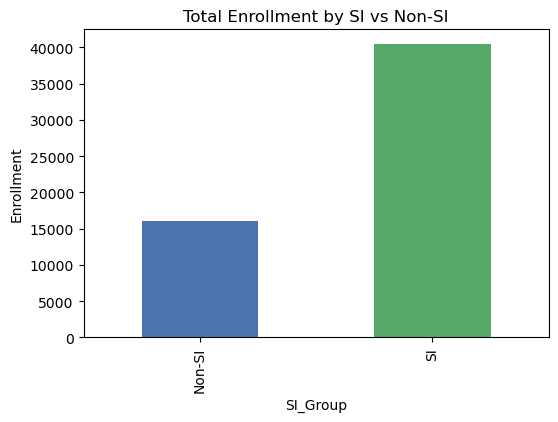

In [25]:
# Quick vizzes
Complete_Enrollment_Dataframe.groupby("SI_Group")["Enrollment"].sum().plot(
    kind="bar", color=["#4C72B0", "#55A868"], figsize=(6,4), title="Total Enrollment by SI vs Non-SI"
)
plt.ylabel("Enrollment")
plt.show()


/var/folders/fp/sbrd1tys4vd2hzst6fyx9qfr0000gn/T/ipykernel_34216/464464563.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Complete_Enrollment_Dataframe.groupby("Class_Size")["Enrollment"].sum().plot(


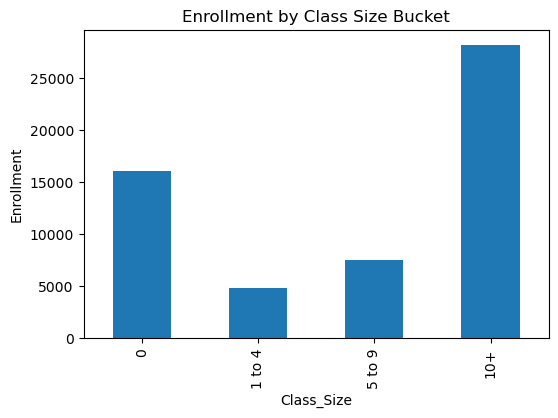

In [26]:
Complete_Enrollment_Dataframe.groupby("Class_Size")["Enrollment"].sum().plot(
    kind="bar", figsize=(6,4), title="Enrollment by Class Size Bucket"
)
plt.ylabel("Enrollment")
plt.show()

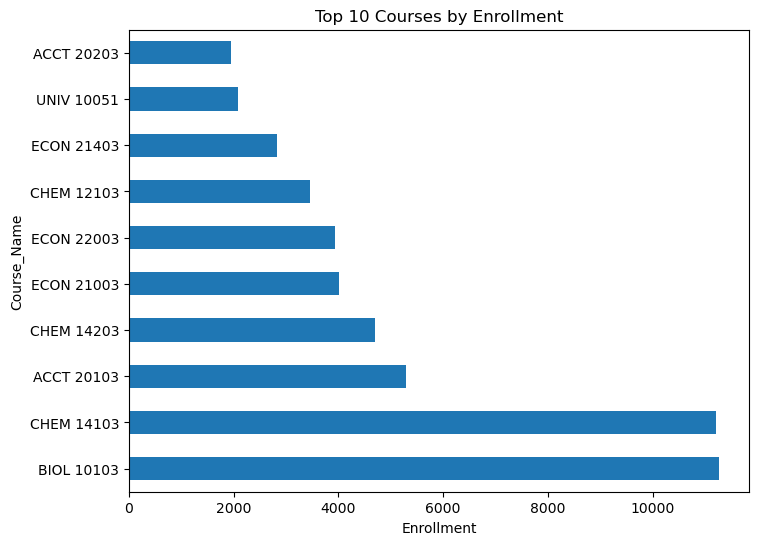

In [27]:
Complete_Enrollment_Dataframe.groupby("Course_Name")["Enrollment"].sum().nlargest(10).plot(
    kind="barh", figsize=(8,6), title="Top 10 Courses by Enrollment"
)
plt.xlabel("Enrollment")
plt.show()


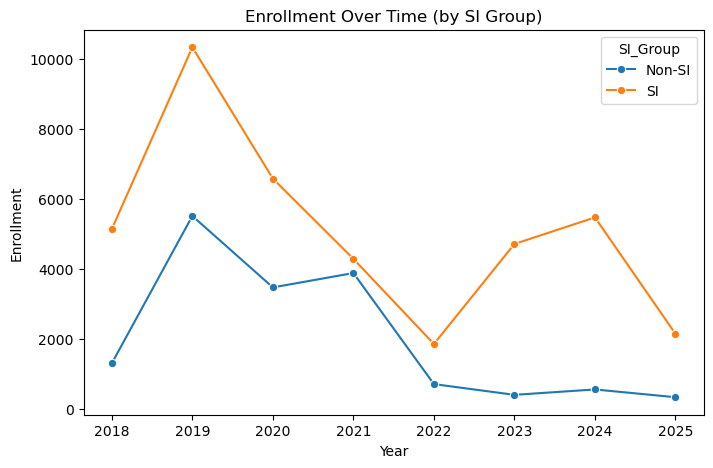

In [28]:
time_group = Complete_Enrollment_Dataframe.groupby(["Year","SI_Group"])["Enrollment"].sum().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=time_group, x="Year", y="Enrollment", hue="SI_Group", marker="o")
plt.title("Enrollment Over Time (by SI Group)")
plt.show()

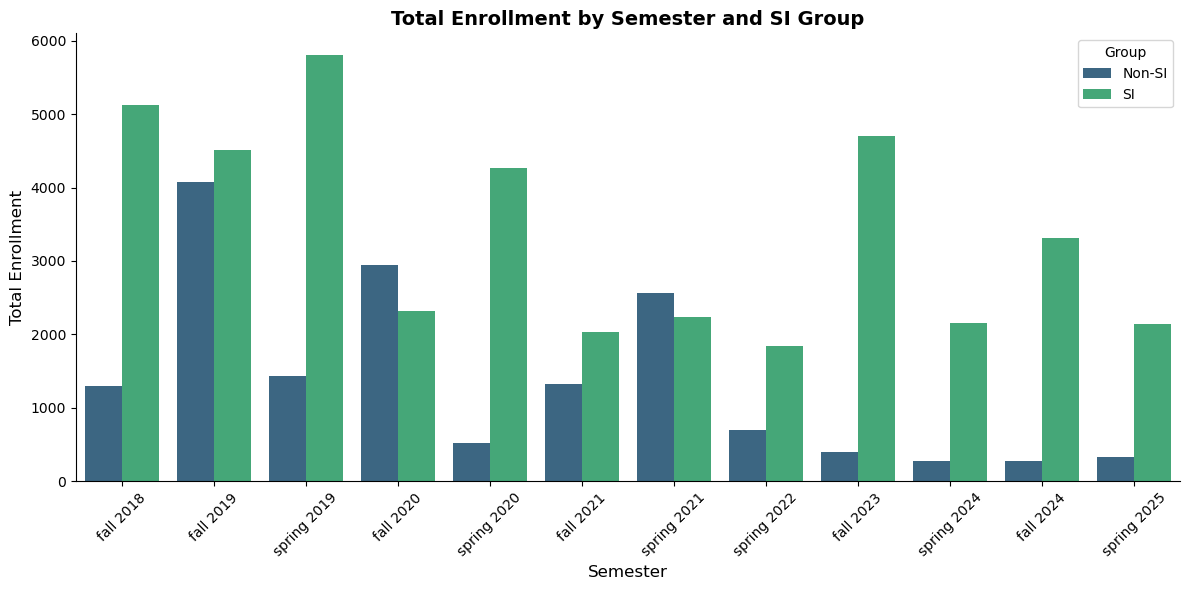

In [51]:
Complete_Enrollment_Dataframe["Term"] = (
    Complete_Enrollment_Dataframe["Semester"] + " " + Complete_Enrollment_Dataframe["Year"].astype(str)
)

term_summary = (
    Complete_Enrollment_Dataframe
    .groupby(["Term", "SI_Group"])["Enrollment"]
    .sum()
    .reset_index()
)

term_summary["Year_Num"] = term_summary["Term"].str.extract(r'(\d+)').astype(int)
term_summary = term_summary.sort_values("Year_Num")

plt.figure(figsize=(12,6))
sns.barplot(data=term_summary, x="Term", y="Enrollment", hue="SI_Group", palette="viridis")

plt.title("Total Enrollment by Semester and SI Group", fontsize=14, weight='bold')
plt.xlabel("Semester", fontsize=12)
plt.ylabel("Total Enrollment", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Group")
sns.despine()
plt.tight_layout()
plt.show()


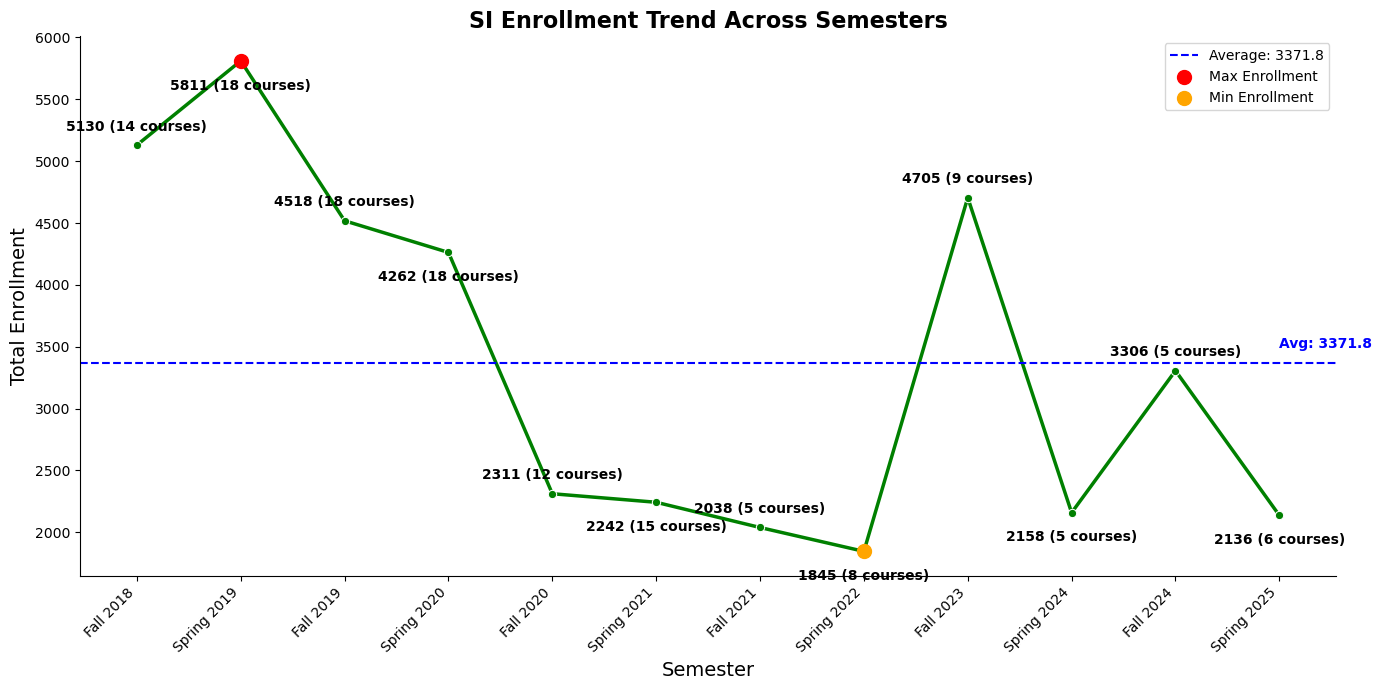

In [71]:
# Filter SI data
si_data = Complete_Enrollment_Dataframe[Complete_Enrollment_Dataframe["SI_Group"] == "SI"].copy()

# Create a combined Term column
si_data["Term"] = si_data["Semester"].str.capitalize() + " " + si_data["Year"].astype(str)

# Count unique courses per semester
course_counts = si_data.groupby("Term")["Course_Name"].nunique().reset_index()
course_counts = course_counts.rename(columns={"Course_Name": "Unique_Course_Count"})

# Sum enrollment per semester
plot_data = si_data.groupby("Term")["Enrollment"].sum().reset_index()
plot_data = plot_data.merge(course_counts, on="Term")

# --- Add chronological ordering ---
semester_order = {"Spring": 1, "Fall": 2}
plot_data["Semester_Name"] = plot_data["Term"].str.split().str[0]
plot_data["Year_Num"] = plot_data["Term"].str.split().str[1].astype(int)
plot_data["Semester_Num"] = plot_data["Semester_Name"].map(semester_order)
plot_data = plot_data.sort_values(["Year_Num", "Semester_Num"]).reset_index(drop=True)

# Plot
plt.figure(figsize=(14,7))
sns.lineplot(
    data=plot_data,
    x="Term", y="Enrollment",
    marker="o", linewidth=2.5, color="green"
)

# Annotate each point with enrollment and course counts (staggered to avoid overlap)
max_offset = max(plot_data["Enrollment"]) * 0.02
for i, (x, y, c) in enumerate(zip(plot_data["Term"], plot_data["Enrollment"], plot_data["Unique_Course_Count"])):
    # alternate labels above/below
    if i % 2 == 0:
        ypos = y + max_offset
    else:
        ypos = y - max_offset*2
    plt.text(
        x=x,
        y=ypos,
        s=f'{y} ({c} courses)',
        ha='center',
        fontsize=10,
        weight='bold'
    )

# Statistics
avg_enroll = plot_data["Enrollment"].mean()
plt.axhline(avg_enroll, color="blue", linestyle="--", linewidth=1.5, label=f'Average: {avg_enroll:.1f}')
plt.text(
    x=plot_data["Term"].iloc[-1], y=avg_enroll + max_offset,
    s=f'Avg: {avg_enroll:.1f}', color="blue", weight='bold'
)

# Highlight max and min points
max_enroll = plot_data["Enrollment"].max()
min_enroll = plot_data["Enrollment"].min()
plt.scatter(plot_data[plot_data["Enrollment"]==max_enroll]["Term"], 
            plot_data[plot_data["Enrollment"]==max_enroll]["Enrollment"], 
            color="red", s=100, zorder=5, label="Max Enrollment")
plt.scatter(plot_data[plot_data["Enrollment"]==min_enroll]["Term"], 
            plot_data[plot_data["Enrollment"]==min_enroll]["Enrollment"], 
            color="orange", s=100, zorder=5, label="Min Enrollment")

plt.title("SI Enrollment Trend Across Semesters", fontsize=16, weight='bold')
plt.xlabel("Semester", fontsize=14)
plt.ylabel("Total Enrollment", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


In [84]:
Complete_Enrollment_Dataframe['Discipline'] = Complete_Enrollment_Dataframe['Course_Name'].str.split(' ').str[0]
Complete_Enrollment_Dataframe['Term'] = Complete_Enrollment_Dataframe['Semester'] + " " + Complete_Enrollment_Dataframe['Year'].astype(str)


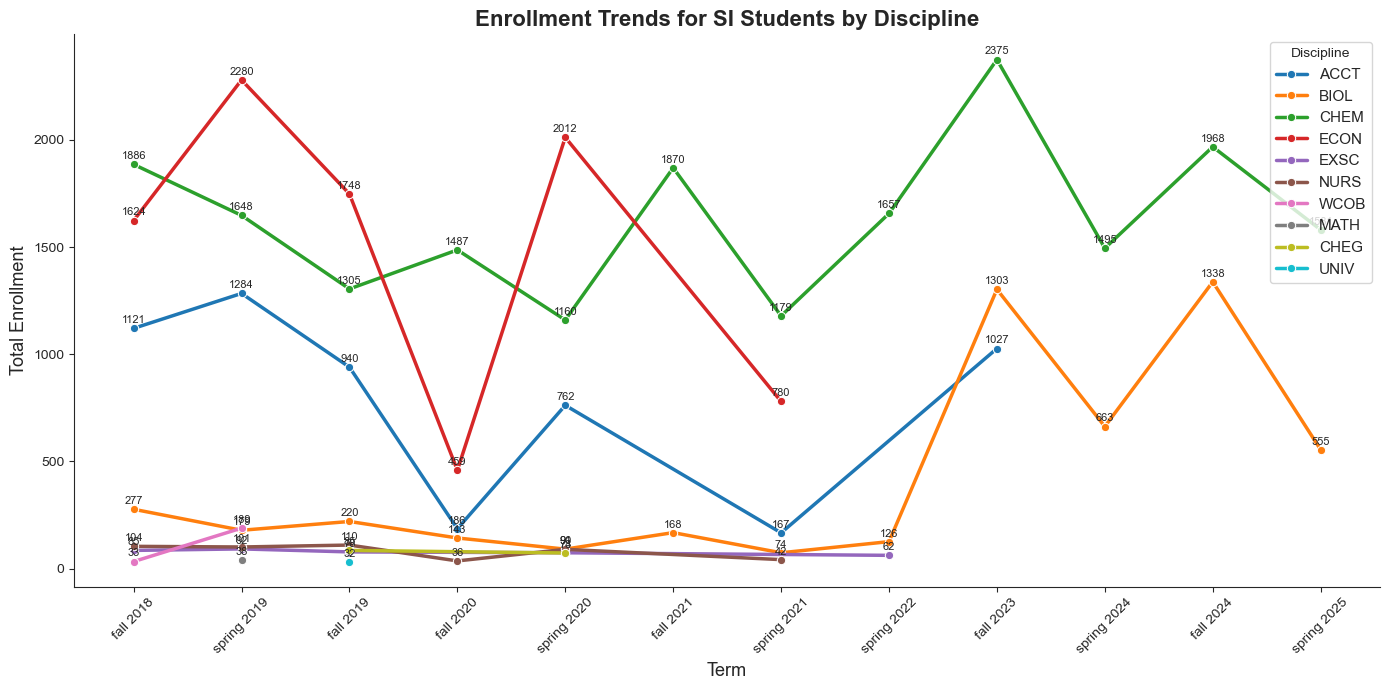

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for SI only
si_trend = trend_summary = Complete_Enrollment_Dataframe[Complete_Enrollment_Dataframe['SI_Group'] == "SI"].copy()

# Add Term and Discipline if not already
si_trend['Discipline'] = si_trend['Course_Name'].str.split(' ').str[0]
si_trend['Term'] = si_trend['Semester'] + " " + si_trend['Year'].astype(str)

# Summarize enrollment by Term and Discipline
si_trend_summary = si_trend.groupby(['Term', 'Discipline'])['Enrollment'].sum().reset_index()
si_trend_summary['Year_Num'] = si_trend_summary['Term'].str.extract(r'(\d+)').astype(int)
si_trend_summary = si_trend_summary.sort_values('Year_Num')

plt.figure(figsize=(14,7))
sns.set_style("ticks")  # no grid

# Distinct colors for each discipline
palette = sns.color_palette("tab10", n_colors=si_trend_summary['Discipline'].nunique())

ax = sns.lineplot(
    data=si_trend_summary,
    x='Term',
    y='Enrollment',
    hue='Discipline',
    marker='o',
    palette=palette,
    linewidth=2.5
)

# Annotate each point
for line in si_trend_summary['Discipline'].unique():
    subset = si_trend_summary[si_trend_summary['Discipline'] == line]
    for x, y in zip(subset['Term'], subset['Enrollment']):
        ax.text(x, y + max(si_trend_summary['Enrollment'])*0.01, str(y), 
                horizontalalignment='center', fontsize=8)

plt.title("Enrollment Trends for SI Students by Discipline", fontsize=16, weight='bold')
plt.xlabel("Term", fontsize=13)
plt.ylabel("Total Enrollment", fontsize=13)
plt.xticks(rotation=45)
plt.legend(title="Discipline", fontsize=11)
sns.despine()  # remove top and right spines
plt.tight_layout()
plt.show()
